In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 2px  black solid !important;
    color: black !important;
}
</style>

In [3]:
# read csv

df = pd.read_csv("CSVForDate.csv")
df.head()

,Date,Open,High,Low,Close
0,1/1/2009,9720.55,9921.70,9711.64,9903.46
1,2/1/2009,9973.06,10070.28,9863.86,9958.22
2,5/1/2009,10109.67,10306.17,10069.11,10275.60
3,6/1/2009,10258.38,10392.12,10150.68,10335.93
4,7/1/2009,10424.96,10469.72,9510.15,9586.88


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [5]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
#lets see if date is a date time series

type(df.Date[0])

str

In [7]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2557 non-null   object 
 1   Open    2557 non-null   float64
 2   High    2557 non-null   float64
 3   Low     2557 non-null   float64
 4   Close   2557 non-null   float64
dtypes: float64(4), object(1)
memory usage: 100.0+ KB


In [9]:
df.head()

,Date,Open,High,Low,Close
0,1/1/2009,9720.55,9921.70,9711.64,9903.46
1,2/1/2009,9973.06,10070.28,9863.86,9958.22
2,5/1/2009,10109.67,10306.17,10069.11,10275.60
3,6/1/2009,10258.38,10392.12,10150.68,10335.93
4,7/1/2009,10424.96,10469.72,9510.15,9586.88


In [10]:
df["Date"] = pd.to_datetime(df["Date"]) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2557 entries, 0 to 2556
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2557 non-null   datetime64[ns]
 1   Open    2557 non-null   float64       
 2   High    2557 non-null   float64       
 3   Low     2557 non-null   float64       
 4   Close   2557 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 100.0 KB


In [12]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [13]:
type(df.Close[0])

numpy.float64

In [14]:
#lets make Date as index

df.set_index("Date", inplace=True)

In [15]:
df.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-05-01', '2009-06-01',
               '2009-07-01', '2009-09-01', '2009-12-01', '2009-01-13',
               '2009-01-14', '2009-01-15',
               ...
               '2019-12-04', '2019-04-15', '2019-04-16', '2019-04-18',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-30'],
              dtype='datetime64[ns]', name='Date', length=2557, freq=None)

In [17]:
df.head()

,Open,High,Low,Close
Date,,,,
2009-01-01,9720.55,9921.70,9711.64,9903.46
2009-02-01,9973.06,10070.28,9863.86,9958.22
2009-05-01,10109.67,10306.17,10069.11,10275.60
2009-06-01,10258.38,10392.12,10150.68,10335.93
2009-07-01,10424.96,10469.72,9510.15,9586.88


In [18]:
df["2009-01" : "2009-02"]

,Open,High,Low,Close
Date,,,,
2009-01-01,9720.55,9921.70,9711.64,9903.46
2009-02-01,9973.06,10070.28,9863.86,9958.22
2009-01-13,9042.36,9261.00,8992.92,9071.36
2009-01-14,9207.52,9412.97,9202.57,9370.49
2009-01-15,9098.08,9123.78,8946.62,9046.74
2009-01-16,9125.65,9342.47,9125.65,9323.59
2009-01-19,9381.78,9409.51,9273.47,9329.57
2009-01-20,9159.76,9159.76,9033.55,9100.55
2009-01-21,8900.78,9051.31,8734.93,8779.17


In [18]:
#lets see data of January only
df["2009-01"]

,Open,High,Low,Close
Date,,,,
2009-01-01,9720.55,9921.70,9711.64,9903.46
2009-01-13,9042.36,9261.00,8992.92,9071.36
2009-01-14,9207.52,9412.97,9202.57,9370.49
2009-01-15,9098.08,9123.78,8946.62,9046.74
2009-01-16,9125.65,9342.47,9125.65,9323.59
2009-01-19,9381.78,9409.51,9273.47,9329.57
2009-01-20,9159.76,9159.76,9033.55,9100.55
2009-01-21,8900.78,9051.31,8734.93,8779.17
2009-01-22,8905.97,8927.69,8699.32,8813.84


In [19]:
df.sort_index(inplace=True)
df_jan = df["2009-01"] # #January data in sorted way

In [20]:
df_jan #january dataset created for see the trend in January

,Open,High,Low,Close
Date,,,,
2009-01-01,9720.55,9921.70,9711.64,9903.46
2009-01-04,9745.77,9921.96,9546.29,9901.99
2009-01-06,14746.51,14906.81,14655.49,14840.63
2009-01-07,14506.43,14727.49,14355.52,14645.47
2009-01-09,15691.27,15923.09,15475.28,15551.19
2009-01-10,17186.20,17195.61,17059.36,17134.55
2009-01-12,16947.46,17218.46,16947.46,17198.27
2009-01-13,9042.36,9261.00,8992.92,9071.36
2009-01-14,9207.52,9412.97,9202.57,9370.49


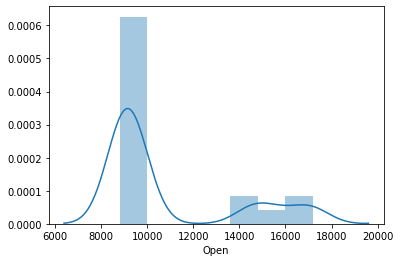

In [20]:
sns.distplot(df_jan["Open"])

In [21]:
df.Close.resample("M").mean()

Date
2009-01-31    10880.364500
2009-02-28    10588.827778
2009-03-31    11079.713810
2009-04-30    12124.201000
2009-05-31    13357.290000
                  ...     
2019-08-31    36974.842500
2019-09-30    37576.065000
2019-10-31    37345.925000
2019-11-30    37016.495000
2019-12-31    37485.463333
Freq: M, Name: Close, Length: 132, dtype: float64

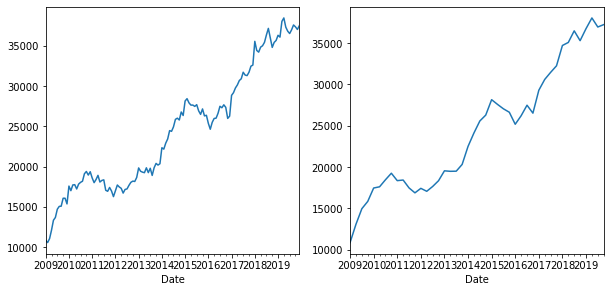

In [22]:
#plotting the above data to see the trend
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
df.Close.resample("M").mean().plot()
plt.subplot(2,2,2)
#lets plot data quarterly
df.Close.resample("Q").mean().plot()

Text(0, 0.5, 'close Price')

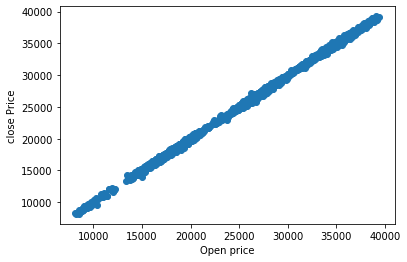

In [23]:
#plt.scatter(df["Open"],df["Close"],data=df)
#plt.xlabel("Open price")
#plt.ylabel("close Price")

plt.scatter(x = "Open", y = "Close", data = df)
plt.xlabel("Open price")
plt.ylabel("close Price")

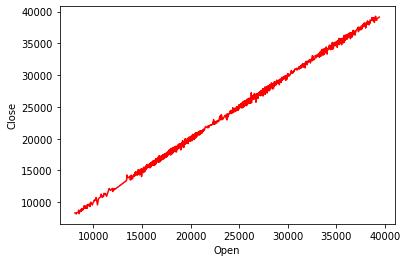

In [24]:
sns.lineplot(df["Open"],df["Close"],data=df,color="r")

In [25]:
df.head()

,Open,High,Low,Close
Date,,,,
2009-01-01,9720.55,9921.70,9711.64,9903.46
2009-01-04,9745.77,9921.96,9546.29,9901.99
2009-01-06,14746.51,14906.81,14655.49,14840.63
2009-01-07,14506.43,14727.49,14355.52,14645.47
2009-01-09,15691.27,15923.09,15475.28,15551.19


In [26]:
#feature correlation
df1=df[["Open","High","Low"]]
df1.corr()

,Open,High,Low
Open,1.000000,0.999863,0.999789
High,0.999863,1.000000,0.999801
Low,0.999789,0.999801,1.000000


In [27]:
#Data is highly correlated hence it will give us a bad model so use only 1 feature
X=df["Open"].values.reshape(-1,1)

In [28]:
#Label
y=df["Close"]

In [29]:
#train test and split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
#lets  do the feature scaling for an acurate model
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(X_train,y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [31]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
results = lreg.score(X_test,y_test)
print(results)

0.9992075190747792


NameError: name 'y_pred' is not defined

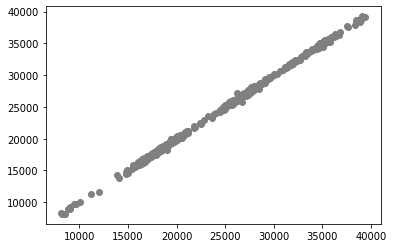

In [38]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()


In [39]:
#To retrieve the intercept:
print(lreg.intercept_)
#For retrieving the slope:
print(lreg.coef_)

41.464783293940854
[0.99732024]


In [41]:
y_pred = lreg.predict(X_test)
print(y_pred)

[25588.10205029 18170.07397773 34692.30943042 17487.39829838
 36601.93833837 16943.50970402 25888.27549694 17266.95063193
 22493.36747111 15690.68598831 23787.08131677 31330.91136474
 25380.2505385  27447.69540166 19365.54180628 27096.82816707
 19437.73781865 27700.26675313 19706.56549007 22394.20391937
 17320.85579105 28347.22839459 20033.79623491 17365.8449072
 26960.06564219 18108.47947954 27617.15008411 17453.43954412
 32211.01655933 19668.60748163 17553.26132721 27909.62421849
 35075.48984087 27520.65935062 26590.3091622  17977.99009898
 19862.50648322 35045.40068915 18965.57649614 20607.81387381
 27737.83580668 25082.27119638 18125.5735485  25420.99107042
 35498.66279306 26847.91698089 20565.87655761 20516.19006311
 33618.5844839  14904.14937889 34392.58477787 16254.43122871
 16342.00591923 18053.17807208 30575.9499142   9040.32522618
 20831.37317942 16497.53801108 26320.72352739 18264.77950798
 33159.46811016 25641.38887086 17427.63886944 31852.22062881
 38559.5483232  17409.597

In [43]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
Date,,
2014-09-07,25444.81,25588.102050
2011-05-18,18086.20,18170.073978
2018-02-11,35011.65,34692.309430
2010-03-18,17519.26,17487.398298
2018-07-16,36323.77,36601.938338
...,...,...
2017-10-08,31531.33,31707.110533
2016-07-04,24685.42,24973.264094
2009-12-14,17097.55,17113.732323


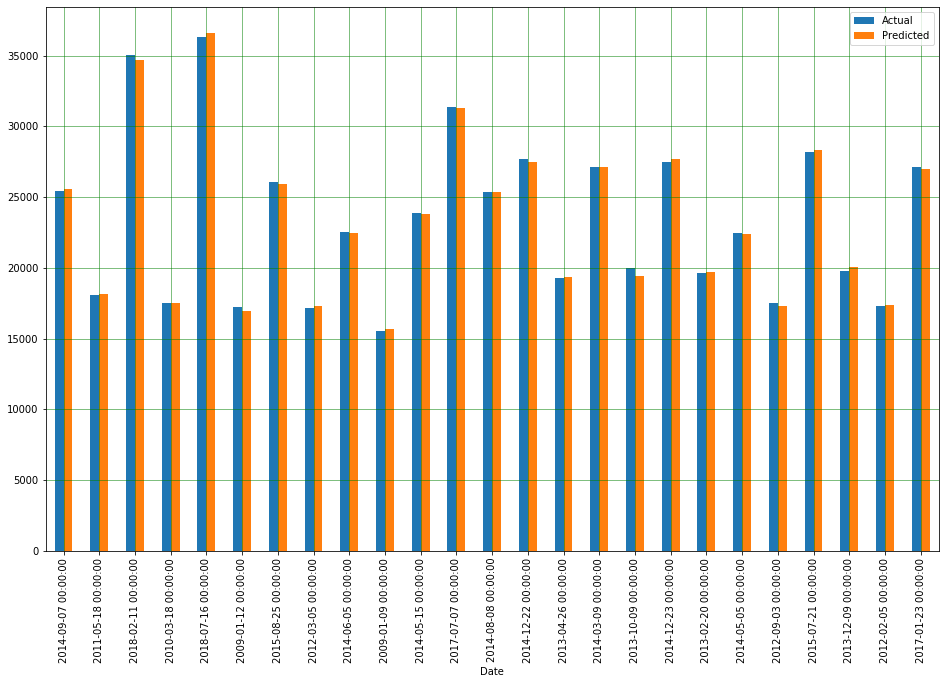

In [44]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

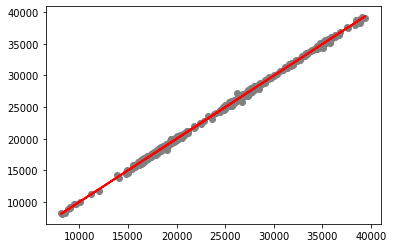

In [45]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [47]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 142.3426738892485
Mean Squared Error: 36857.78121245506
Root Mean Squared Error: 191.9838045577154
